In [1]:
import os
import shutil

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import pretty_midi
import IPython.display as ipd
import libfmp.c1

from utils.data import *

In [2]:
midi_note_df = pd.read_csv('./data/midi_to_notes.csv', index_col=0)
midi_note_df

,C,C#/Db,D,D#/Eb,E,F,F#/Gb,G,G#/Ab,A,A#/Bb,B
Octave,,,,,,,,,,,,
-2,0,1,2,3,4,5,6,7,8,9,10,11
-1,12,13,14,15,16,17,18,19,20,21,22,23
0,24,25,26,27,28,29,30,31,32,33,34,35
1,36,37,38,39,40,41,42,43,44,45,46,47
2,48,49,50,51,52,53,54,55,56,57,58,59
3,60,61,62,63,64,65,66,67,68,69,70,71
4,72,73,74,75,76,77,78,79,80,81,82,83
5,84,85,86,87,88,89,90,91,92,93,94,95
6,96,97,98,99,100,101,102,103,104,104,106,107


In [3]:
path = './data/theorytab/MIDI/t/the-weeknd/cant-feel-my-face/pre-chorus-and-chorus_symbol_key.mid'
midi_data = pretty_midi.PrettyMIDI(path)
df = midi_to_df(midi_data)

In [4]:
for key in midi_data.key_signature_changes:
    print(key.key_number, key.time)

9 0.0


In [5]:
df

,Start,End,Pitch,Velocity,Instrument
0,0.000000,0.277778,70,80,melody
1,0.277778,0.555556,69,80,melody
2,0.555556,1.111112,67,80,melody
3,1.666668,1.944446,64,80,melody
4,1.944446,2.500002,67,80,melody
...,...,...,...,...,...
69,31.388914,31.666692,57,80,melody
70,32.777804,32.916693,60,80,melody
71,32.916693,33.194471,62,80,melody
72,33.194471,33.611138,62,80,melody


In [6]:
print(f'Key of song: {pretty_midi.key_number_to_key_name(midi_data.key_signature_changes[0].key_number)}')
print(f'Time signature: {midi_data.time_signature_changes[0].numerator}/{midi_data.time_signature_changes[0].denominator}')
print(f'Event time in seconds of each beat: \n {midi_data.get_beats()}')
print(f'Beat start in seconds: {midi_data.estimate_beat_start()}')
print(f'Beat start / beat duration: {midi_data.estimate_beat_start() / midi_data.get_beats()[1]}')
print(f'Beats per minute based on pretty_midi.estimate_tempo: {midi_data.estimate_tempo()}')
print(f'Beats per minute based on 60s/beat duration: {60 / midi_data.get_beats()[1]}')

Key of song: A Major
Time signature: 4/4
Event time in seconds of each beat: 
 [ 0.        0.555556  1.111112  1.666668  2.222224  2.77778   3.333336
  3.888892  4.444448  5.000004  5.55556   6.111116  6.666672  7.222228
  7.777784  8.33334   8.888896  9.444452 10.000008 10.555564 11.11112
 11.666676 12.222232 12.777788 13.333344 13.8889   14.444456 15.000012
 15.555568 16.111124 16.66668  17.222236 17.777792 18.333348 18.888904
 19.44446  20.000016 20.555572 21.111128 21.666684 22.22224  22.777796
 23.333352 23.888908 24.444464 25.00002  25.555576 26.111132 26.666688
 27.222244 27.7778   28.333356 28.888912 29.444468 30.000024 30.55558
 31.111136 31.666692 32.222248 32.777804 33.33336  33.888916]
Beat start in seconds: 1.944446
Beat start / beat duration: 3.4999999999999996
Beats per minute based on pretty_midi.estimate_tempo: 157.09078341828248
Beats per minute based on 60s/beat duration: 107.9999136000691


In [7]:
df.loc[:, ['Start', 'End']] /= midi_data.get_beats()[1]
df.loc[:, ['Start', 'End']] *= 0.5
df

,Start,End,Pitch,Velocity,Instrument
0,0.000,0.250,70,80,melody
1,0.250,0.500,69,80,melody
2,0.500,1.000,67,80,melody
3,1.500,1.750,64,80,melody
4,1.750,2.250,67,80,melody
...,...,...,...,...,...
69,28.250,28.500,57,80,melody
70,29.500,29.625,60,80,melody
71,29.625,29.875,62,80,melody
72,29.875,30.250,62,80,melody


In [8]:
fs = 44100
audio_data = df_to_midi(df).fluidsynth(fs=fs, sf2_path='./data/soundfonts/Steinway_Grand_Piano_1.2.sf2')
ipd.Audio(audio_data, rate=fs)

In [9]:
df = add_octave_and_note(df, midi_note_df)

In [10]:
midi_data2 = df_to_midi(df)

In [11]:
midi_data2.instruments

[Instrument(program=0, is_drum=False, name="")]

In [12]:
df2 = midi_to_df(midi_data2)
df2

,Start,End,Pitch,Velocity,Instrument
0,0.000,0.250,70,80,
1,0.250,0.500,69,80,
2,0.500,1.000,67,80,
3,1.500,1.750,64,80,
4,1.750,2.250,67,80,
...,...,...,...,...,...
69,28.250,28.500,57,80,
70,29.500,29.625,60,80,
71,29.625,29.875,62,80,
72,29.875,30.250,62,80,


# Play audio

In [ ]:
fs = 44100
audio_data = midi_data.fluidsynth(fs=fs, sf2_path='./data/soundfonts/Steinway_Grand_Piano_1.2.sf2')
ipd.Audio(audio_data, rate=fs)

In [ ]:
fs = 22050
audio_data = midi_data.fluidsynth(fs=fs, sf2_path='./data/soundfonts/Steinway_Grand_Piano_1.2.sf2')
ipd.Audio(audio_data, rate=fs)

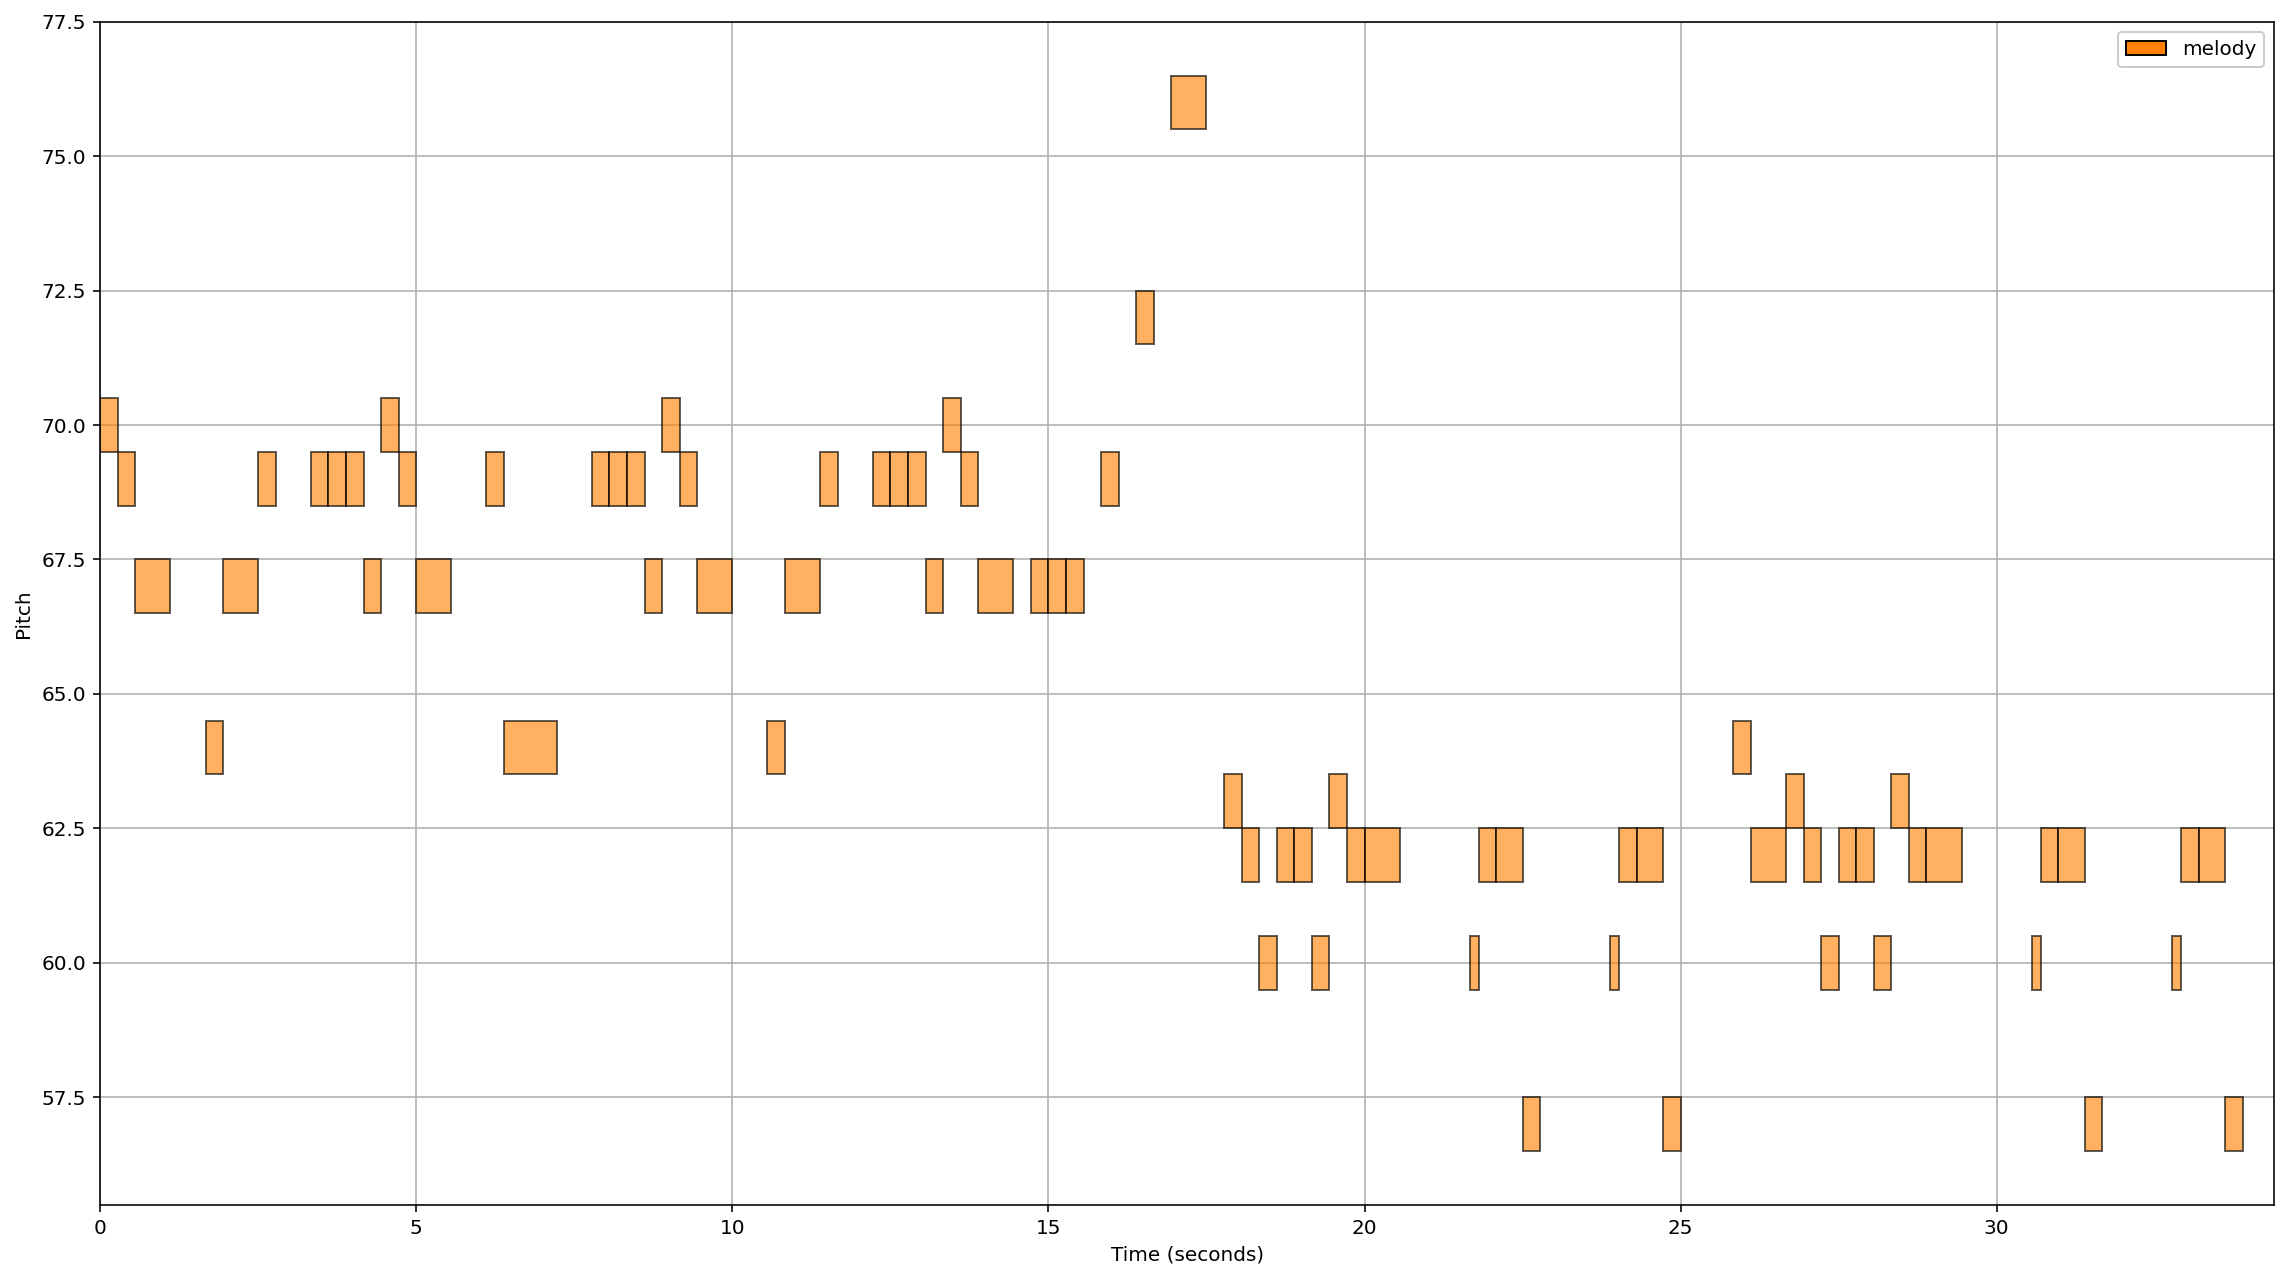

In [15]:
score = midi_to_list(midi_data)
libfmp.c1.visualize_piano_roll(score, figsize=(16, 9), velocity_alpha=True);

# Check keys of different midi files

In [ ]:
key_counts = np.zeros(24, dtype=int)
get_key_and_sort_files_to_dir('./data/theorytab/MIDI/', key_counts)
fig = plt.figure(figsize=(12, 6))
plt.bar(x=[get_key_note(i, tight=True) for i in range(24)], height=key_counts)
plt.tight_layout()

# Change all single key songs to key of C Major

In [ ]:
remove_empty('./data/single_key/')

In [ ]:
def change_key(directory: str, n_midi_files: int=0):
    if n_midi_files > 0: # multiple midi files for same song
        pitches = []
        notes = []
        for entry in os.scandir(directory):
            if entry.is_file() and entry.name.endswith('.mid'):
                midi_data = pretty_midi.PrettyMIDI(entry.path)
                # key_signature = midi_data.key_signature_changes
                df = midi_to_df(midi_data)
                unique_pitches = np.unique(df['Pitch'].values)
                pitches += list(unique_pitches)
                notes += [pretty_midi.note_number_to_name(p) for p in unique_pitches]
        pitches = set(pitches)
        notes = set(notes)
        print(f'{directory}: {notes}')
    else:
        for entry in os.scandir(directory):
            if entry.is_dir():
                n_midi_files = len([name for name in os.listdir(entry.path) if name.endswith('.mid')])
                change_key(entry.path, n_midi_files)

In [ ]:
change_key('./data/single_key/4/')

In [ ]:
path = './data/theorytab/MIDI/p/prince/purple-rain/verse_symbol_key.mid'
midi_data = pretty_midi.PrettyMIDI(path)
df = midi_to_df(midi_data)
df